# Leveraging Sentiment Analysis for Enhanced Brand Management

**Members**<br>
Cynthia JepKogei<br>
Winnie Nzuve<br>
Phyllis Wangui<br>
George Mbugua<br>
Daniel Murith<br>
Wallace Ouma<br>
Kevan Ndwiga<br>
Kennedy Owino<br>

## Problem Statement
---
In the rapidly evolving technology market, understanding customer sentiment towards products is crucial for companies like Google and Apple. These insights can guide product development, marketing strategies, customer service, and more. However, manually analysing customer sentiment is a time-consuming and labour-intensive process. Given the vast amount of customer feedback available on platforms like Twitter, it is virtually impossible for humans to process all the data in a timely manner.
Moreover, human analysis is subject to bias and inconsistency, and the quality of analysis can vary greatly depending on the individual’s understanding and interpretation. This makes it difficult to scale and standardize the sentiment analysis process.

Therefore, there is a need for an automated, efficient, and reliable solution to analyse customer sentiment towards Google and Apple products. Machine Learning, with its ability to learn patterns from large datasets and make predictions, offers a promising solution to this problem.
By applying Machine Learning techniques for sentiment analysis, we can process vast amounts of data in a fraction of the time it would take a human. This not only saves time and resources but also provides consistent and unbiased analysis. Furthermore, Machine Learning models can continuously learn and improve over time, adapting to new trends and nuances in customer sentiment.

## Business Understanding
---
Twitter is a platform where users often share their experiences and opinions about products. Analysing these sentiments can provide valuable feedback on what users like or dislike about a product, which can guide improvements and new features. Sentiment analysis can help understand how the brand is perceived in the market. Positive sentiment is usually associated with a strong brand image, while negative sentiment can indicate potential issues that need to be addressed.  By analysing sentiment, Apple and Google can identify trends in consumer behaviour and preferences. This can inform strategic decisions, such as the timing of product releases or marketing campaigns.

Comparing sentiment towards different products can provide insights into competitive positioning. For example, if sentiment towards an Apple product is more positive than a similar Google product, it might indicate a competitive advantage for Apple. Negative tweets can be a signal of customer service issues that need to be addressed. Apple and Google can use sentiment analysis to proactively identify and resolve these issues. This data-driven approach fosters brand loyalty, increases customer satisfaction, and ultimately drives sales growth.

### Key Objectives
$i.$ Utilize Natural Language Processing techniques to construct a machine learning model for automated sentiment analysis of tweets related to Google and Apple products.<br>
$ii.$ Evaluate and select the most suitable machine learning model for sentiment analysis based on its performance metrics.<br>
$iii.$ Analyse frequency of the sentiments expressed in tweets about Google and Apple products.

## Data Understanding
---
The dataset, sourced from CrowdFlower via [data.world](https://data.world/crowdflower/brands-and-product-emotions), comprises over 9,000 tweets with sentiment ratings labeled as positive, negative, or neutral by human raters.

The tweets were posted during the South by Southwest conference, primarily discussing Google and Apple products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed, they were also asked to specify which brand or product was the target of that emotion. The data was compiled in 2013 by Kent Cavender-Bares.

Tweets, being succinct and emotionally charged, serve as effective indicators of consumer sentiment. South by Southwest serves as a platform for showcasing the latest technology, enabling consumers to compare products from major tech companies directly and potentially mitigating biases to some extent.

The target variable was engineered into three classes: tweets with positive sentiment, negative sentiment, and those with neutral sentiment, encompassing 'I can't tell' sentiments and 'no emotion' sentiments.

## Exploratory Data Analysis
---

In [1]:
#importing the needed libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import nltk
from nltk.corpus import stopwords,wordnet
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
#modeling
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score, roc_auc_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from tensorflow import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [3]:
#importing the data
data = pd.read_csv('dataset.csv', encoding= 'unicode_escape')

data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
#changing the column names for easier readability
data.columns = ['tweet_text', 'product', 'sentiment']

In [5]:
#Viewing the first few rows
data.head()

,tweet_text,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   product     3291 non-null   object
 2   sentiment   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Data Cleaning
---

In [7]:
#Checking for null values
data.isna().sum()

tweet_text       1
product       5802
sentiment        0
dtype: int64

In [8]:
#we drop the one raw of tweet that has missing text

data.dropna(subset=['tweet_text'], inplace=True)


In [9]:
#sampling out records of products with null values to visually inspect
data.loc[data['sentiment'] == 'No emotion toward brand or product'].sample(10)

,tweet_text,product,sentiment
4578,@mention New iPad Apps For Speech Therapy And ...,NaN,No emotion toward brand or product
8179,"Me too! RT @mention My #agnerd confession, usi...",iPad,No emotion toward brand or product
7188,No from hotpot RT @mention Google Places with ...,NaN,No emotion toward brand or product
5863,RT @mention Google Tests ÛÏCheck-in OffersÛ...,NaN,No emotion toward brand or product
2470,#sxsw ipad store sold out of everything except...,NaN,No emotion toward brand or product
8633,Block party capitalism ballroom f #sxsw\nJust ...,NaN,No emotion toward brand or product
4996,"Google looks to the future with mobile, locati...",NaN,No emotion toward brand or product
6867,RT @mention want an ipad 2? here is your chanc...,NaN,No emotion toward brand or product
230,Apple IIe ad in the '85 SI swimsuit issue at a...,NaN,No emotion toward brand or product
3896,Someone mistakenly walked off with my iPad fro...,NaN,No emotion toward brand or product


In the `product` column, it is observed that almost 60% of the data is missing. Further inspection reveals that most of these rows are those in which users had no emotion toward the Google or Apple products.

The loss of such a substantial amount of data cannot be afforded. Therefore, for these records, a new product category called `undefined` will be created for the analysis of this project.

In [10]:
#replacing null value with undefined
data['product'].fillna('undefined', inplace = True)

In [11]:
#sanity check
data.isna().sum()

tweet_text    0
product       0
sentiment     0
dtype: int64

In [12]:
#viewing distribution of products

data['product'].value_counts()

product
undefined                          5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

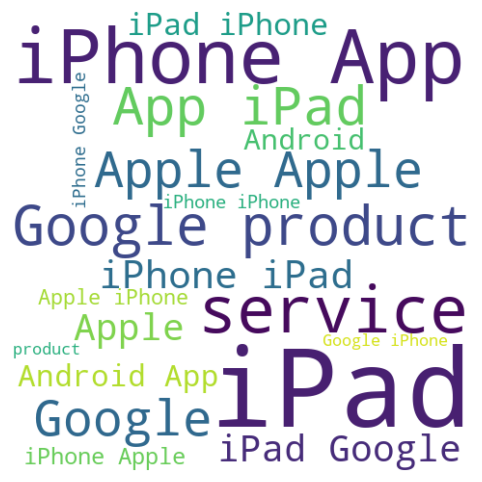

In [17]:
# Combine all products texts into one large text
all_products = ' '.join(product for product in data['product'] if product != 'undefined')

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                       width=480, height=480, max_words=150, random_state=42).generate(all_products)

# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=1, y=1)
plt.show()

The spread within products is highly imbalanced, with over half of the tweets not mentioning a specific product. To address this, another column called "Brand" will be added, indicating the brand the tweet is about based on the information from the "Product" column.  

First, all entries in the "Product" column will be double-checked. Then, a function will be created to loop through the product column and assign the appropriate brand to the new column. If the brand is undefined, the function will iterate through the text of the tweet to identify any mentions of product words. If none are found, the brand will remain undefined. If words for both brands are mentioned, the brand will be designated as "Both". This approach aims to create more balanced classes within this new feature.

In [18]:
#creating a function to identify the brand

def find_brand(Product, Tweet): 
    #Labeling brand as Undetermined by default
    brand = 'Undefined' 

    #Labeling Google based on product column
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))): 
        brand = 'Google' 

    #Labeling Apple based on product column

    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))): 
        brand = 'Apple' 
    
    if (brand == 'Undefined'): 
        #Making tweet lowercase
        lower_tweet = Tweet.lower() 

        #labeling google if there is mention of google or android on tweet
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android')) 

        #labeling apple based on tweet
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip')) 
        
        #if it has both identifiers in the tweet
        if (is_google and is_apple): 
            brand = 'Both' 
        elif (is_google):
            brand = 'Google' 
        elif (is_apple):
            brand = 'Apple' 
    
    return brand

#Applying function to product and tweet_text columb

data['brand'] = data.apply(lambda x: find_brand(x['product'], x['tweet_text']), axis = 1) 
data['brand'].value_counts(normalize= True) 

brand
Apple        0.590189
Google       0.304883
Undefined    0.081500
Both         0.023427
Name: proportion, dtype: float64

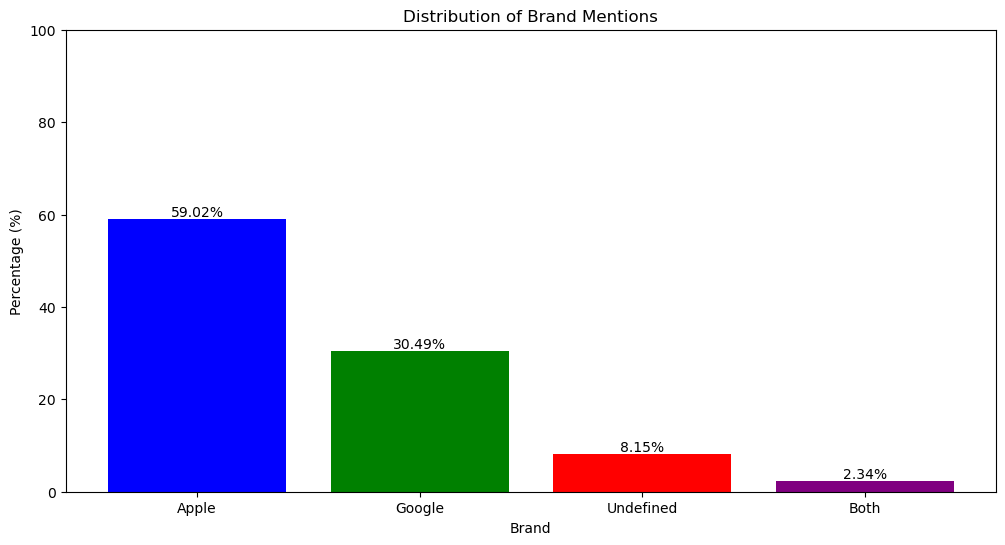

In [19]:
#Visually inspecting the brand distribution

brand_distribution = data['brand'].value_counts(normalize=True).to_dict()

brands = list(brand_distribution.keys())
percentages = [value * 100 for value in brand_distribution.values()]  # Convert proportions to percentages

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(brands, percentages, color=['blue', 'green', 'red', 'purple'])

plt.xlabel('Brand')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Brand Mentions')
plt.ylim(0, 100)

# Adding percentage data labels above each bar
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha = 'center')

plt.show()

The distribution has undergone a notable shift. Although class imbalances persist, they manifest differently this time. Over half of the tweets pertain to the brand Apple, while approximately a third relate to the brand Google. Tweets with undetermined brands constitute about eight percent of all tweets, with those mentioning both brands accounting for only around two percent. While this represents an improvement over the previous scenario where over half of the tweets were classified as unknown (referring to undetermined product tweets), the current imbalances remain suboptimal.

In [20]:
#inspecting the distiribution of sentiments
data['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

These classes exhibit significant imbalance, with over half of the tweets categorized as having no emotion, followed by approximately a third rated as positive. Less than 600 tweets were classified as negative, and fewer than 200 were labeled as "I can't tell," indicating uncertainty in sentiment determination. Overall, just over a third of the tweets were assigned positive or negative sentiment.

For the analysis in this project, "No emotion" and "I can't tell" will be grouped together and relabeled as "Neutral." Additionally, the names within the Emotion column will be simplified, changing "Positive emotion" to "Positive" and "Negative emotion" to "Negative." This adjustment aims to enhance clarity and consistency for subsequent analysis.

In [21]:
#creating a function to modify the sentiments

def clean_sentiments(data, column):
    #Making list for new names of emotions
    emotion_list = [] 
    for sentiment in data[column]:
        #Renaming `no emotions` sentiment
        if sentiment == "No emotion toward brand or product": 
            #renaming to `Neutral`        
            emotion_list.append('Neutral') 

        #Renaming I can't tell to `Neutral` too
        elif sentiment == "I can't tell": 
            emotion_list.append('Neutral')

        #Renaming positive emotion
        elif sentiment == "Positive emotion": 
            emotion_list.append('Positive') 

        #Renaming negative emotion
        elif sentiment == "Negative emotion": 
            emotion_list.append('Negative') 
    
    # Assigning the updated emotion_list to the DataFrame's column
    data[column] = emotion_list
    return data

#applying the function to the dataset

data = clean_sentiments(data, 'sentiment') 


In [22]:
#previewing the modified classes
data['sentiment'].value_counts(normalize = True) 

sentiment
Neutral     0.609767
Positive    0.327541
Negative    0.062692
Name: proportion, dtype: float64

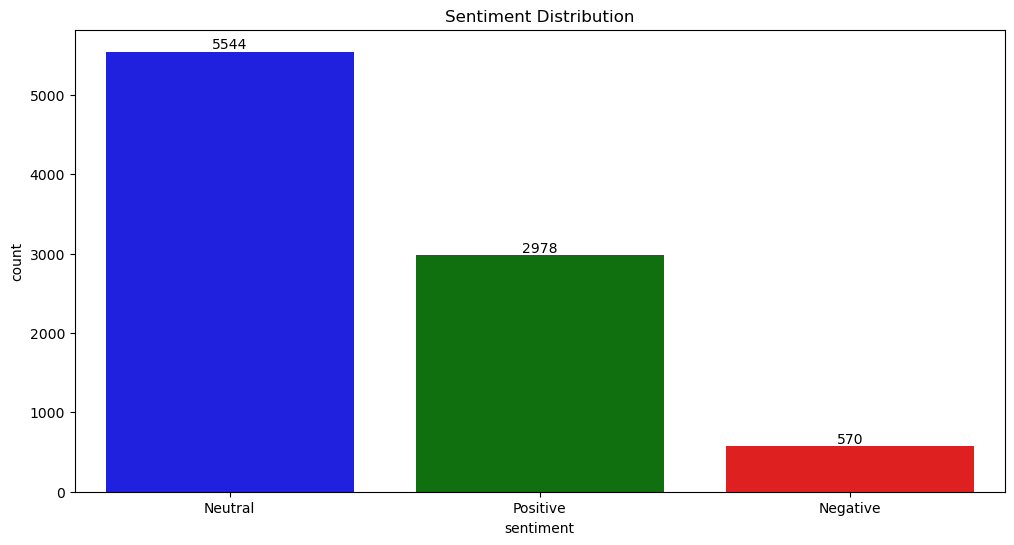

In [23]:
# Sorting the data by sentiment counts in descending order
sentiment_counts = data['sentiment'].value_counts(normalize=True) * len(data)
sorted_sentiment_counts = sentiment_counts.sort_values(ascending=False)

# Define custom color palette
custom_palette = {'Neutral': 'blue', 'Positive': 'green', 'Negative': 'red'}

# Sentiment distribution plot with custom palette
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=data, order=sorted_sentiment_counts.index, palette=custom_palette)

# Adding number of each sentiment above each bar
for i, count in enumerate(sorted_sentiment_counts):
    plt.text(i, count, f'{int(count)}', ha='center', va='bottom')

plt.title('Sentiment Distribution')
plt.show()

## Preprocessing

In [24]:
#previewing the  data
data.head()

,tweet_text,product,sentiment,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google


In [25]:
#previwing random tweets
data['tweet_text'].loc[1133]

'Check out the @mention Route {link} ; RSVP here -&gt; https://www.facebook.com/event.php?eid=141164002609303 #sxswi #sxsw'

**Cleaning the Tweets**

The following steps are taken to clean the tweets:

1. **Removal of Placeholders**: 
   - "{link}" and '[video]' are removed because they serve as placeholders for external links and do not provide valuable information.

2. **Elimination of Twitter Handles**: 
   - Twitter handles are removed as they do not convey significant information.

3. **Stopword Removal**: 
   - Stopwords, which are common words that do not add much meaning to the text, are eliminated.

4. **Punctuation Removal**: 
   - Punctuation marks are removed to ensure consistency and simplify further processing.

5. **Exclusion of "SXSW" Mentions**: 
   - All instances of "SXSW" are removed from the tweets since they are present in a large number of tweets collected during the South by Southwest conference and do not contribute meaningful content.

6. **Websites and HTML Formatting Removal**: 
   - Websites and HTML formatting are removed to extract only the textual content.

After these cleaning steps, the following transformations are applied:

- **Lowercasing**: 
  - Every word in the corpus is converted to lowercase to standardize the text.

- **Tokenization**: 
  - The text is tokenized to split it into individual words or tokens.

- **Lemmatization**: 
 

In [26]:
#downloading stopwords
nltk.download('stopwords', quiet= True)
stopword_list = stopwords.words('english')

nltk.download('wordnet', quiet= True)

#instantiate regextokenize and defining a pattern to remove words less that 3 characters
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")

#add 'SXSW' to the stopwordlist
stopword_list.append('sxsw')

#add link the stopword_list
stopword_list.append('link')

#add punctuations to stopwords
stopword_list += punctuation

#instantiating lemmatizer
lemma = WordNetLemmatizer()

#Instantiating tweet tokenizer

tweet_tokenize = TweetTokenizer(strip_handles= True)

In [27]:
#defining the function to clean and tokenize the tweets
def clean_tweets(text):
    """
    This function takes a tweet and preprocesses it in readiness for modelling
    """
    #Use TweetTokenizer object to remove the handles from the Tweet
    no_handle = tweet_tokenize.tokenize(text)

    #Join the list of non-handle tokens back together
    tweet = " ".join(no_handle) 

    #remove http websites, hashtag sign, any words in curly brackets,
        #any words with ampersand in front, www dot com websites, links,
        #videos, and non-english characters
    clean = re.sub("(https?:\/\/\S+) \
                   |(#[A-Za-z0-9_]+) \
                   |(\{([a-zA-Z].+)\}) \
                   |(&[a-z]+;) \
                   |(www\.[a-z]?\.?(com)+|[a-z]+\.(com))\
                   |({link})\
                   |([^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*)"," ", tweet)
    
    #Turn all the tokens lowercase
    lower_tweet = clean.lower()
    #Only include words with 3 or more characters
    token_list = tokenizer.tokenize(lower_tweet)

    #Remove stopwords
    stopwords_removed=[token for token in token_list if token not in stopword_list]

    #Lemmatize the remaining word tokens
    lemma_tokens = [lemma.lemmatize(token) for token in stopwords_removed]
    return lemma_tokens

In [28]:
#sample tweet before cleaning
data['tweet_text'].iloc[100]

'Headline: &quot;#iPad 2 is the Must-Have Gadget at #SXSW&quot; Hmm... I could have seen that one coming! {link} #gadget'

In [29]:
#sanity check for the cleaninig function
clean_tweets(data['tweet_text'].iloc[100])

['headline',
 'ipad',
 'must',
 'gadget',
 'hmm',
 'could',
 'seen',
 'one',
 'coming',
 'gadget']

In [30]:
#applying the function to the dataset
data['clean_tweet_token'] = data['tweet_text'].apply(clean_tweets)

data.head()

,tweet_text,product,sentiment,brand,clean_tweet_token
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,"[iphone, hr, tweeting, rise_austin, dead, need..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,"[wait, ipad, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,"[hope, year, festival, crashy, year, iphone, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,"[great, stuff, fri, marissa, mayer, google, ti..."


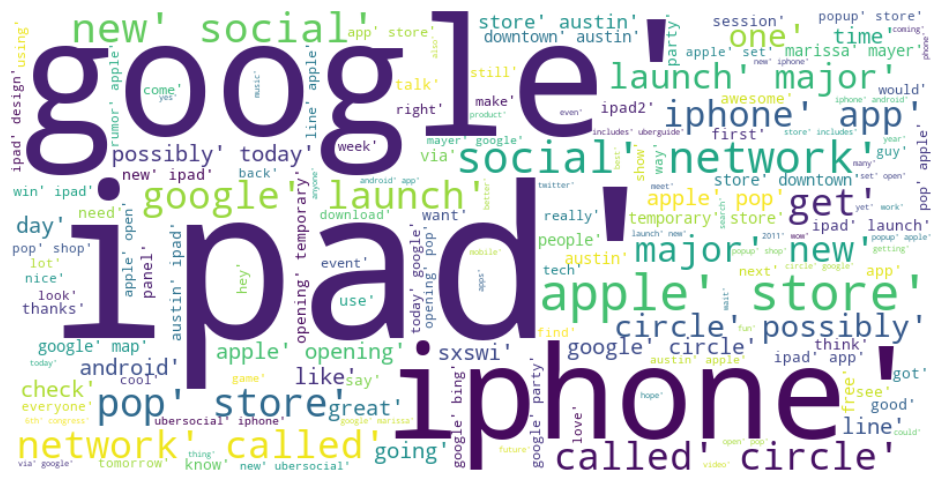

In [32]:
#plotting the frequency of words on the cleaned tokens
# Combine all tokenized clean tweet words into one large text
all_tweets = ' '.join(data['clean_tweet_token'].astype(str))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                       width=800, height=400, max_words=150, random_state=42).generate(all_tweets)

# Display the generated image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=1, y=1)
plt.show()

## Modelling
---

In [33]:
#data check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_text         9092 non-null   object
 1   product            9092 non-null   object
 2   sentiment          9092 non-null   object
 3   brand              9092 non-null   object
 4   clean_tweet_token  9092 non-null   object
dtypes: object(5)
memory usage: 684.2+ KB


A new DataFrame will be created containing only the cleaned tokens column and emotions column. 

Before modeling the data, a train-test split will be performed to divide the data into training and test sets, thereby avoiding data leakage.

In [34]:
#subseting the columns for modeling

df = data[['clean_tweet_token', 'sentiment']]

df.head()

,clean_tweet_token,sentiment
0,"[iphone, hr, tweeting, rise_austin, dead, need...",Negative
1,"[know, awesome, ipad, iphone, app, likely, app...",Positive
2,"[wait, ipad, also, sale]",Positive
3,"[hope, year, festival, crashy, year, iphone, app]",Negative
4,"[great, stuff, fri, marissa, mayer, google, ti...",Positive


In [35]:
#defining target and Feature
X = df['clean_tweet_token']

y = df['sentiment']

#performing train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 )

#checking shapes of the both train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6819,)
(6819,)
(2273,)
(2273,)


### Baseline Model
**Logistic regression**

Choosing a logistic regression model as the baseline for a multiclass sentiment analysis task is justified by its simplicity and interpretability. Despite its simplicity, logistic regression often performs well in practice, especially when the classes are linearly separable or when there are limited training data.


In [56]:
#Function to passthrough our pipelines
def passthrough(doc): 
    return doc 


#defining function to evaluate model performance
def confmat_and_classreport(estimator, X, y, labels, set_name): 
    #predicts from estimators
    predictions = estimator.predict(X) 
    
    #print classification report name
    print(f'Classification Report for {set_name} Set') 

    #print classification report numbers
    print(classification_report(y, predictions, target_names = labels)) 

    #Making plots for confusion matrix
    matrix = confusion_matrix(y, predictions) 
    disp = ConfusionMatrixDisplay(matrix)

    disp.plot(cmap=plt.cm.Blues, colorbar=False)


In [42]:
#instantiating label encoder
le = LabelEncoder()
#transforming both train and test sets
y_train_enc = le.fit_transform(y_train)

y_test_enc = le.transform(y_test)

#building modeling pipeline using Count Vectorizer

LRpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passthrough, tokenizer = passthrough)), 
    ('Classifier', LogisticRegression()), 
]) 

#Fitting to pipeline
LRpipelineCV.fit(X_train, y_train_enc) 

c:\Users\KennedyOdhiambo\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passthrough at 0x0000025A5C476050>,
                                 tokenizer=<function passthrough at 0x0000025A5C476050>)),
                ('Classifier', LogisticRegression())])

Classification Report for Training Set


              precision    recall  f1-score   support

    Negative       0.98      0.71      0.82       419
     Neutral       0.88      0.96      0.92      4185
    Positive       0.92      0.80      0.86      2215

    accuracy                           0.90      6819
   macro avg       0.93      0.83      0.87      6819
weighted avg       0.90      0.90      0.89      6819



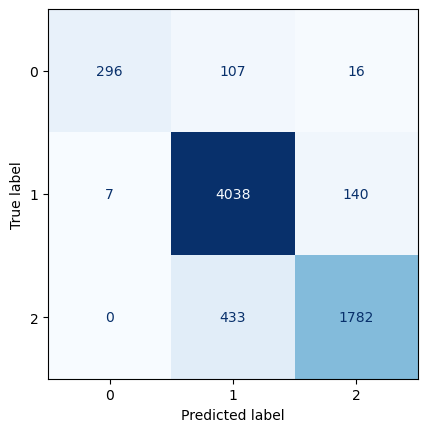

In [57]:
#Evaluating Training LR CV Model
confmat_and_classreport(LRpipelineCV, X_train, y_train_enc, le.classes_, 'Training') 


Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.61      0.28      0.38       151
     Neutral       0.72      0.81      0.76      1359
    Positive       0.60      0.52      0.56       763

    accuracy                           0.68      2273
   macro avg       0.64      0.54      0.57      2273
weighted avg       0.67      0.68      0.67      2273



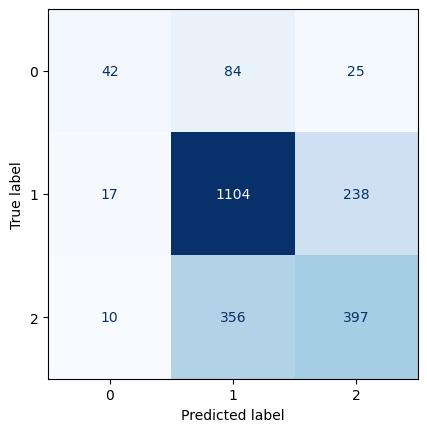

In [58]:
#Evaluating Test LR CV Model
confmat_and_classreport(LRpipelineCV, X_test, y_test_enc, le.classes_, 'Test') 

The baseline model exhibits superior performance on the training set compared to a naive model that would consistently predict a neutral sentiment, yielding an accuracy score of 60%. However, when evaluated on the test set, the accuracy drops to 68%, revealing a substantial discrepancy of 23% between the training and test sets. This discrepancy suggests that the model is overfitting the training data, as it fails to generalize well to unseen data.


### Model Tuning


Reducing the value of C to 0.5 is justified considering the previous model performance, particularly the observed overfitting phenomenon. By decreasing the regularization strength, the logistic regression model becomes more flexible and less constrained, allowing it to capture more complex patterns in the training data. This adjustment aims to strike a balance between bias and variance, as a lower value of C encourages the model to adapt more closely to the training data while still controlling for excessive complexity. Consequently, the regularization imposed by the reduced value of C mitigates the risk of overfitting, leading to improved generalization performance and a more robust model overall.

In [45]:
#Inceasing nreasing regularization
LRpipelineCV_tuned = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passthrough, tokenizer = passthrough)), 
    ('Classifier', LogisticRegression(C = 0.5)), 
]) #Creating Logistic Regression pipeline with count vectorizer

LRpipelineCV_tuned.fit(X_train, y_train_enc)

c:\Users\KennedyOdhiambo\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passthrough at 0x0000025A5C476050>,
                                 tokenizer=<function passthrough at 0x0000025A5C476050>)),
                ('Classifier', LogisticRegression(C=0.5))])

Classification Report for Training Set
              precision    recall  f1-score   support

    Negative       0.97      0.56      0.71       419
     Neutral       0.85      0.96      0.90      4185
    Positive       0.89      0.75      0.82      2215

    accuracy                           0.87      6819
   macro avg       0.90      0.76      0.81      6819
weighted avg       0.87      0.87      0.86      6819



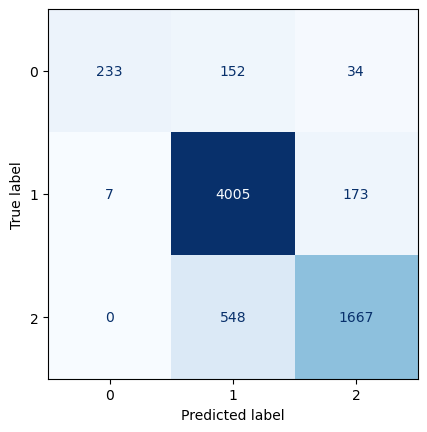

In [59]:
#Evaluating Training LR CV Model tuned
confmat_and_classreport(LRpipelineCV_tuned, X_train, y_train_enc, le.classes_, 'Training') 

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       0.64      0.20      0.30       151
     Neutral       0.70      0.83      0.76      1359
    Positive       0.61      0.50      0.55       763

    accuracy                           0.68      2273
   macro avg       0.65      0.51      0.54      2273
weighted avg       0.67      0.68      0.66      2273



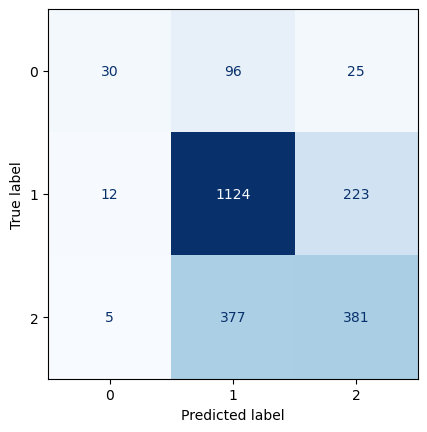

In [60]:
#Evaluating Test LR CV Model tuned
confmat_and_classreport(LRpipelineCV_tuned, X_test, y_test_enc, le.classes_, 'Test') 

The overfitting issue has been slightly mitigated, with the training accuracy decreasing to 87% while the test set accuracy remains at 68%. Despite this marginal improvement, further exploration of alternative models is warranted to enhance model performance. By delving into additional modeling techniques, a more effective and robust model is aimed to be developed that can better generalize to unseen data.

In [51]:
#Creating Logistic Regression pipeline with tfidf vectorizer

LRpipelineTF = Pipeline([
    ('BOW', TfidfVectorizer(preprocessor = passthrough, tokenizer = passthrough)), 
    ('Classifier', LogisticRegression(C = 0.5)), 
]) 
#Fitting to pipeline
LRpipelineTF.fit(X_train, y_train_enc) 

c:\Users\KennedyOdhiambo\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('BOW',
                 TfidfVectorizer(preprocessor=<function passthrough at 0x0000025A5C476050>,
                                 tokenizer=<function passthrough at 0x0000025A5C476050>)),
                ('Classifier', LogisticRegression(C=0.5))])

Classification Report for Training Set


              precision    recall  f1-score   support

    Negative       0.92      0.03      0.06       419
     Neutral       0.74      0.96      0.84      4185
    Positive       0.84      0.52      0.64      2215

    accuracy                           0.76      6819
   macro avg       0.84      0.50      0.51      6819
weighted avg       0.78      0.76      0.73      6819



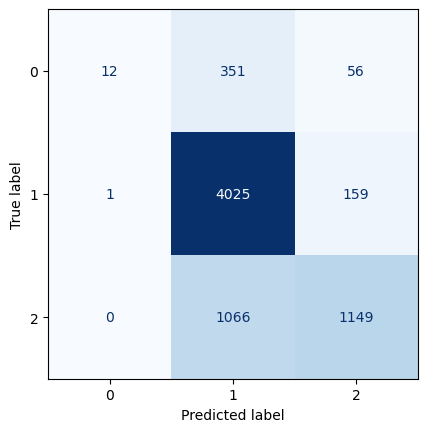

In [61]:
#Evaluating Training LR TF-IDF Model tuned
confmat_and_classreport(LRpipelineTF, X_train, y_train_enc, le.classes_, 'Training') 

Classification Report for Test Set
              precision    recall  f1-score   support

    Negative       1.00      0.01      0.01       151
     Neutral       0.67      0.90      0.77      1359
    Positive       0.63      0.38      0.47       763

    accuracy                           0.66      2273
   macro avg       0.77      0.43      0.42      2273
weighted avg       0.68      0.66      0.62      2273



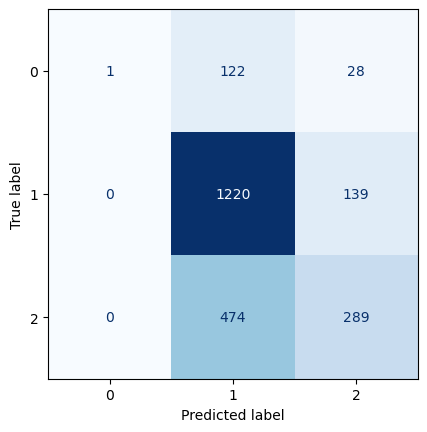

In [62]:
#Evaluating Test LR TF-IDF Model tuned
confmat_and_classreport(LRpipelineTF, X_test, y_test_enc, le.classes_, 'Test') 

### Deep Learning